# PyMVPD LITE Tutorial

This is a tutorial of how to implememt MultiVariate Pattern Dependence (MVPD) analysis using linear regression models. The tutorial will walk you through analysis specification, data loading and finally analysis execution.

In [12]:
import os, sys
sys.path.append("..")
from mvpdlite import data_loading, model_exec

## Step 1 - Analysis Specification

The first step of MVPD analysis is to specify the following details:

the participant whose data are to be analyzed ('sub');

the total number of experimental runs ('total_run'); 

the paths to the directories containing processed functional data (‘filepath_func’);

the paths to the directories containing the predictor ROI mask (‘filepath_mask1’) and the target ROI mask (‘filepath_mask2’); 

the path to the directory where the extracted functional data will be saved (‘roidata_save_dir’); 

the path to the directory where the results will be saved (‘results_save_dir’); 

the type of model to be used (‘model_type’);

the option to save predicted timecourses (‘save_prediction’);

the model hyperparameters.

In [13]:
# Subject/Participant
sub='sub-01'
# Total number of experimental runs
total_run=8

In [14]:
# Functional Data
filepath_func=[]
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run1.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run2.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run3.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run4.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run5.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run6.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run7.nii.gz']
filepath_func+=['./testdata/'+sub+'/'+sub+'_movie_bold_space-MNI152NLin2009cAsym_preproc_denoised_run8.nii.gz']

In [15]:
# Predictor ROI Mask
filepath_mask1='./testdata/'+sub+'/'+sub+'_FFA_80vox_bin.nii.gz'
# Target ROI Mask
filepath_mask2='./testdata/GM_thr0.1_bin.nii.gz'

base1=os.path.basename(filepath_mask1)
base2=os.path.basename(filepath_mask2)
roi_1_name=base1.split('.nii')[0]
roi_2_name=base2.split('.nii')[0]

In [16]:
# Output Directory
roidata_save_dir='./testdata/roi_data/'
results_save_dir='./results/'

In [19]:
# MVPD Model
model_type='L2_LR' # ['PCA_LR', 'L2_LR']

In [9]:
# only for PCA_LR
num_pc=3 # number of principal components used 

# only for L2_LR
alpha=0.01 # regularization strength 

In [10]:
# Save Data
save_prediction=False # default

## Step 2 - Data Loading

In [11]:
data_loading.load_data(sub, total_run, roi_1_name, roi_2_name, filepath_func, filepath_mask1, filepath_mask2, roidata_save_dir)

start loading data of sub-01
loading data in run 1
loading data in run 2
loading data in run 3
loading data in run 4
loading data in run 5
loading data in run 6
loading data in run 7
loading data in run 8
data loading done!


## Step 3 - Analysis Execution

In [12]:
model_exec.MVPD_exec(model_type, sub, total_run, alpha, num_pc, roidata_save_dir, roi_1_name, roi_2_name, filepath_func, filepath_mask1, filepath_mask2, results_save_dir, save_prediction)


start running L2_LR model for sub-01
test run: 1
test run: 2
test run: 3
test run: 4
test run: 5
test run: 6
test run: 7
test run: 8

average results across runs

done!


## Visualizing MVPD results

After running the MVPD model, you can visualize the results (e.g. average variance explained map across experimental runs) using a variety of visualization tools (e.g. Connectome Workbench, Mango, FSLeyes) and perform further statistical analyses.

In [27]:
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for sub-01 L2_LR variance explained map')

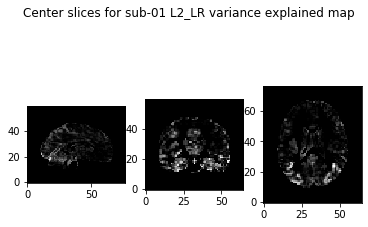

In [28]:
var_expl_img = nib.load(results_save_dir+sub+'_var_expl_map_'+model_type+'_avgruns.nii.gz')
var_expl_data = var_expl_img.get_fdata()
var_expl_shape = var_expl_data.shape;
x_center = var_expl_shape[0]//2;
y_center = var_expl_shape[1]//2;
z_center = var_expl_shape[2]//2;

show_slices([var_expl_data[x_center, :, :],
             var_expl_data[:, y_center, :],
             var_expl_data[:, :, z_center]])

plt.suptitle("Center slices for "+sub+" "+model_type+" variance explained map") 

Here are the example figures generated from our test runs (predictor ROI: FFA, target ROI: GM).

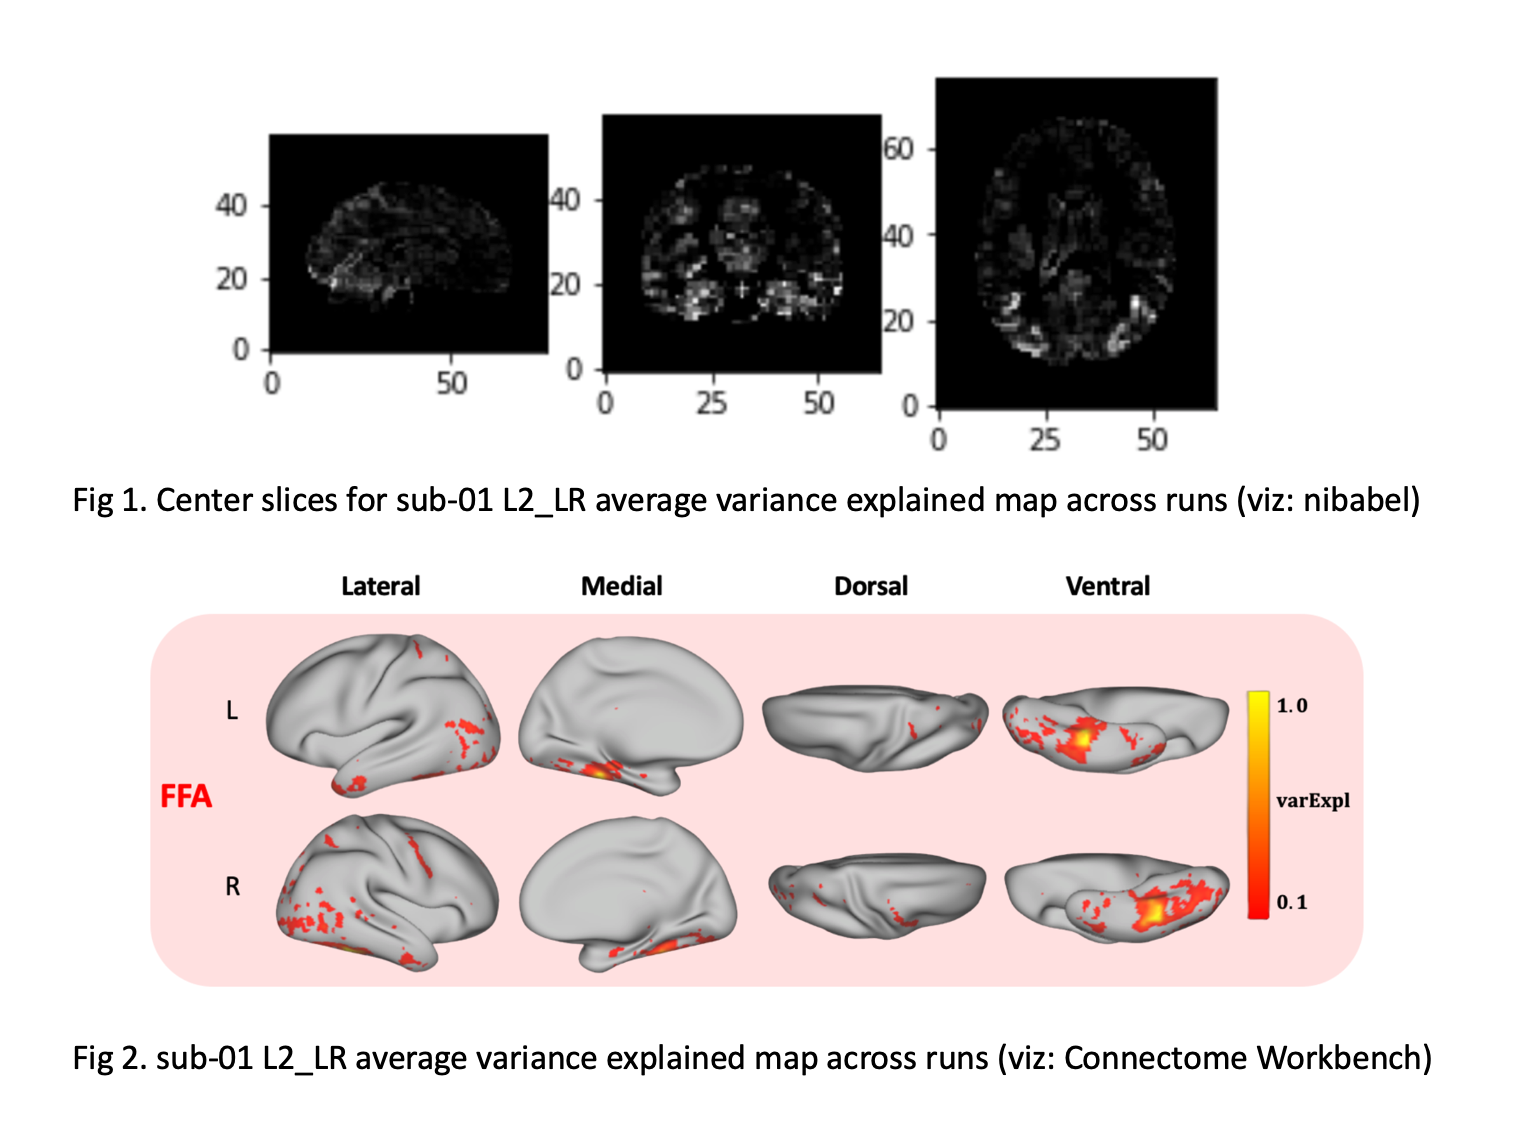

In [29]:
img_path='./example_viz_figures.png'
display(Image.open(img_path))